# US Flight Delay Analysis - Winter Season (2018-2019)
This notebook contains the analysis of the "On-Time : Reporting Carrier On-Time Performance" dataset, for: December 2018, January 2019 and February 2019.

The analysis of the data set will focus on the study of the Air Traffic Delays related to the Air Traffic Congestion.

In terms of technology, we will use pandas for the data manipulation and analysis.

Each phase of the process followed is indicated by cronological order.

### Imports:

In [287]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os

#Visualitzation
import matplotlib.pyplot as plt
import seaborn as sbn

# 01. Data Loading

In [288]:
#Winter Season dataset
df = pd.read_csv('C:\\Users\\GerardEspejo\\Desktop\\TFM\\Data\\Winter_Season.csv')
df.sample(5)

,Unnamed: 0,Year,Quarter,Month,DayOfMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,RegistrationNum,...,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil,DepTime2,ArrTime2,DepDateTime,ArrDateTime
1319810,1319810,2019,1,2,14,4,2019-02-14,WN,WN,N266WN,...,240.0,211.0,198.0,1.0,1407.0,6,09:32,12:03,2019-02-14 09:32:00,2019-02-14 12:03:00
876819,876819,2019,1,1,27,7,2019-01-27,DL,DL,N816DN,...,77.0,60.0,43.0,1.0,270.0,2,09:34,10:34,2019-01-27 09:34:00,2019-01-27 10:34:00
537930,537930,2018,4,12,21,5,2018-12-21,AA,AA,N917NN,...,200.0,191.0,168.0,1.0,1188.0,5,18:50,20:01,2018-12-21 18:50:00,2018-12-21 20:01:00
401253,401253,2018,4,12,28,5,2018-12-28,WN,WN,N567WN,...,65.0,53.0,41.0,1.0,287.0,2,05:27,07:20,2018-12-28 05:27:00,2018-12-28 07:20:00
87786,87786,2018,4,12,2,7,2018-12-02,B6,B6,N913JB,...,173.0,158.0,143.0,1.0,1121.0,5,16:27,19:05,2018-12-02 16:27:00,2018-12-02 19:05:00


# 02. Data Analysis

In [289]:
df.shape

(1711002, 49)

In [290]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime'],
      dtype='object')

## Air Traffic Congestion Study - Regions / Airports

##### Top 20 States per volume of flights

In [291]:
group_by_state = df.groupby('OriginStateName')

In [292]:
#Top 20 States per volume of flights
group_by_state['OriginStateName'].count().sort_values(ascending=False).head(20)

OriginStateName
California        190120
Texas             183671
Florida           146907
Illinois          101367
Georgia            96275
New York           91996
North Carolina     78706
Virginia           63528
Colorado           63198
Arizona            50398
Michigan           44993
Pennsylvania       42797
Nevada             42629
Minnesota          37631
Washington         34200
Massachusetts      33857
New Jersey         33199
Missouri           31514
Tennessee          30369
Utah               28622
Name: OriginStateName, dtype: int64

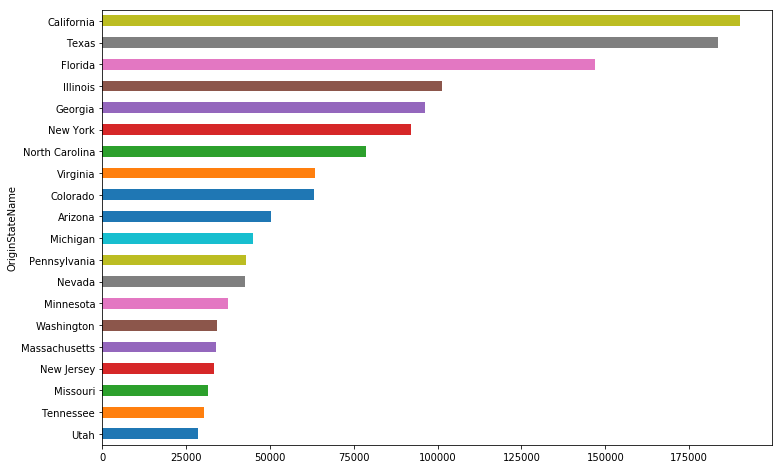

In [293]:
group_by_state['OriginStateName'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

##### Top 20 Cities per volume of flights

In [434]:
#Number of airports per city
count_airports_per_city = df.groupby('OriginCityName')['Origin_IATA'].unique()
count_airports_per_city.map(lambda x: len(x)).sort_values(ascending=False).head(10)

OriginCityName
Columbus, OH      2
Houston, TX       2
New York, NY      2
Phoenix, AZ       2
Chicago, IL       2
Washington, DC    2
Gillette, WY      1
Fort Myers, FL    1
Fort Smith, AR    1
Fort Wayne, IN    1
Name: Origin_IATA, dtype: int64

In [294]:
group_by_city = df.groupby(['OriginCityName', 'OriginStateName'])

In [295]:
#Top 20 cities per volume of flights
group_by_city['OriginCityName'].count().sort_values(ascending=False).head(20)

OriginCityName         OriginStateName
Chicago, IL            Illinois           96861
Atlanta, GA            Georgia            90778
New York, NY           New York           71144
Dallas/Fort Worth, TX  Texas              67089
Houston, TX            Texas              57330
Charlotte, NC          North Carolina     55326
Denver, CO             Colorado           54214
Los Angeles, CA        California         52634
Washington, DC         Virginia           49691
Phoenix, AZ            Arizona            44499
San Francisco, CA      California         40249
Las Vegas, NV          Nevada             37896
Detroit, MI            Michigan           35720
Minneapolis, MN        Minnesota          35519
Orlando, FL            Florida            35373
Boston, MA             Massachusetts      33587
Newark, NJ             New Jersey         31748
Seattle, WA            Washington         30331
Philadelphia, PA       Pennsylvania       27143
Salt Lake City, UT     Utah               27110
N

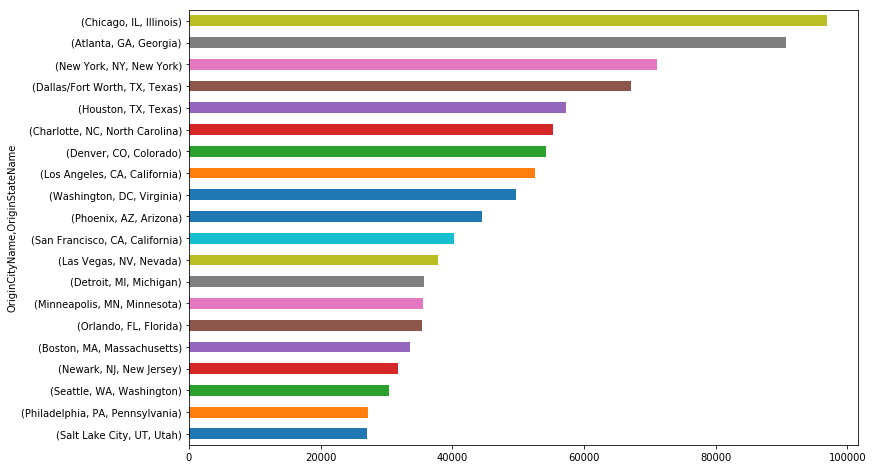

In [296]:
group_by_city['OriginCityName'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

##### Top 20 airports per volume of flights

In [297]:
group_by_airport = df.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [298]:
#How many airports are contemplated in the dataset?
group_by_airport['Origin_IATA'].unique().count()

346

In [299]:
#Top 20 airports per volume of flights
group_by_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         OriginStateName
ATL          Atlanta, GA            Georgia            90778
ORD          Chicago, IL            Illinois           77774
DFW          Dallas/Fort Worth, TX  Texas              67089
CLT          Charlotte, NC          North Carolina     55326
DEN          Denver, CO             Colorado           54214
LAX          Los Angeles, CA        California         52634
PHX          Phoenix, AZ            Arizona            43083
IAH          Houston, TX            Texas              42845
SFO          San Francisco, CA      California         40249
LGA          New York, NY           New York           40223
LAS          Las Vegas, NV          Nevada             37896
DTW          Detroit, MI            Michigan           35720
MSP          Minneapolis, MN        Minnesota          35519
MCO          Orlando, FL            Florida            35373
DCA          Washington, DC         Virginia           33942
BOS          Boston, MA          

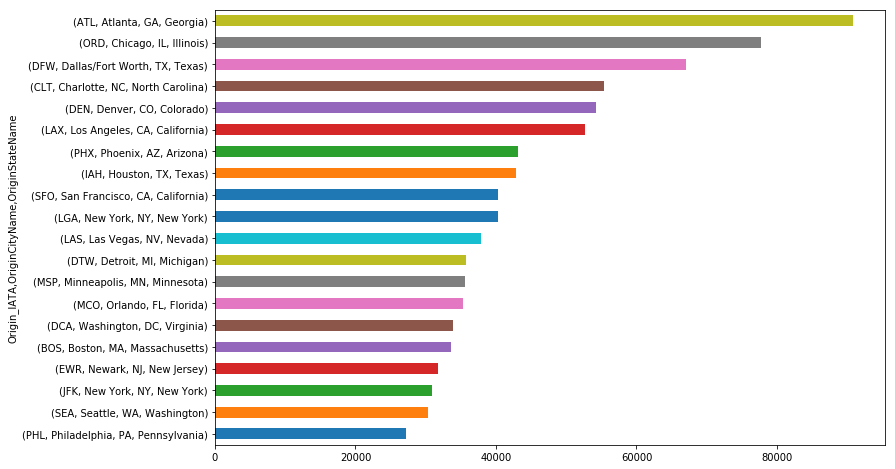

In [300]:
group_by_airport['Origin_IATA'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

## Air Traffic Delay Study

### Initial Exploratory:

##### Delay Distribution (All flights)

In [301]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime'],
      dtype='object')

In [302]:
delay = df[['ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15']]
delay.sample(5)

,ArrDelayMin,ArrDelayMin0,ArrDelay_Ind15,ArrDelayGroup_Int15
1553528,-1.0,0.0,0.0,-1.0
962146,-6.0,0.0,0.0,-1.0
1071517,26.0,26.0,1.0,1.0
133961,89.0,89.0,1.0,5.0
198905,-9.0,0.0,0.0,-1.0


In [303]:
arrdelay = df['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay0 = df['ArrDelayMin0'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Ind15 = df['ArrDelay_Ind15'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Group_Int15 = df['ArrDelayGroup_Int15'].describe().apply(lambda x: format(x, 'f'))

data = {'Arrival': arrdelay, 'ArrDelayMin0': arrdelay0,
       'ArrDelayMin_Ind15': arrdelay_Ind15, 'ArrDelayGroup_Int15': arrdelay_Group_Int15}
description = pd.DataFrame(data)
description

,Arrival,ArrDelayMin0,ArrDelayMin_Ind15,ArrDelayGroup_Int15
count,1668014.000000,1668014.000000,1668014.000000,1668014.000000
mean,5.321637,14.237462,0.199867,-0.176197
std,50.973347,47.342975,0.399900,2.394602
min,-117.000000,0.000000,0.000000,-2.000000
25%,-15.000000,0.000000,0.000000,-1.000000
50%,-6.000000,0.000000,0.000000,-1.000000
75%,9.000000,9.000000,0.000000,0.000000
max,2649.000000,2649.000000,1.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244B4EC3C88>,
      dtype=object)

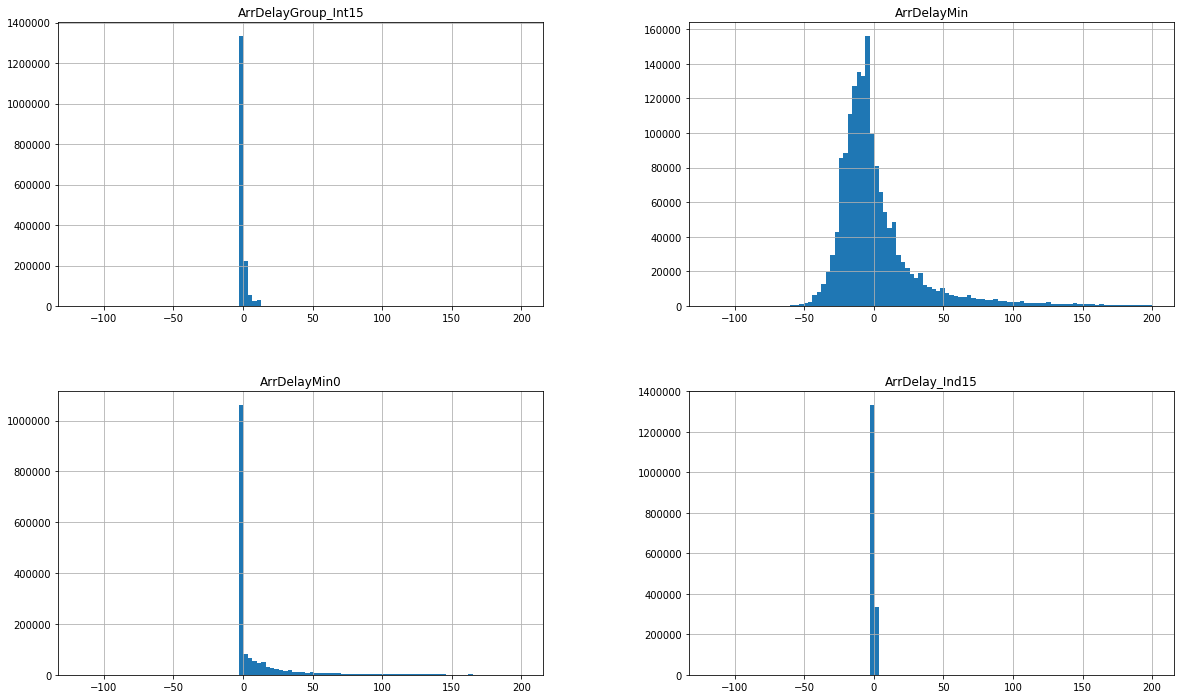

In [304]:
delay.hist(range=[min(df['ArrDelayMin']),200], bins=100, figsize=(20,12))

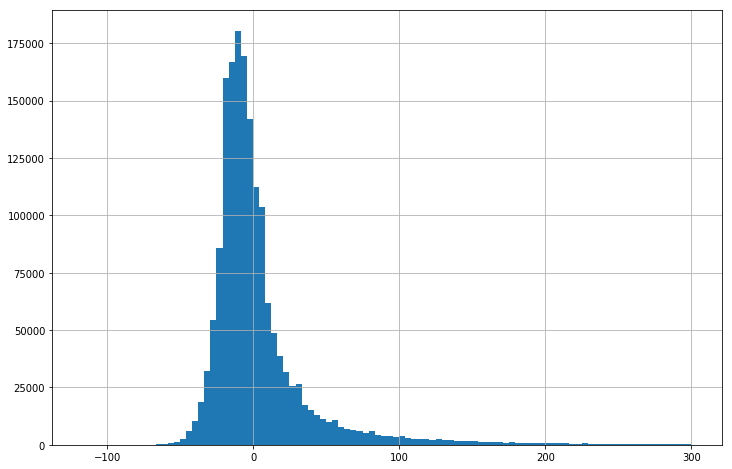

In [305]:
delay['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8))

##### Delay Distribution (Only delayed flights)

In [260]:
df['delayed'] = df['ArrDelayMin'].apply(lambda x: x > 0)
delayed = df[df['delayed']==True]

In [263]:
delay2 = delayed[['ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15']]
delay2.sample(5)

,ArrDelayMin,ArrDelayMin0,ArrDelay_Ind15,ArrDelayGroup_Int15
156650,6.0,6.0,0.0,0.0
1682967,15.0,15.0,1.0,1.0
861981,3.0,3.0,0.0,0.0
230423,1.0,1.0,0.0,0.0
1552136,8.0,8.0,0.0,0.0


In [261]:
arrdelay = delayed['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay0 = delayed['ArrDelayMin0'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Ind15 = delayed['ArrDelay_Ind15'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Group_Int15 = delayed['ArrDelayGroup_Int15'].describe().apply(lambda x: format(x, 'f'))

data2 = {'Arrival': arrdelay, 'ArrDelayMin0': arrdelay0,
       'ArrDelayMin_Ind15': arrdelay_Ind15, 'ArrDelayGroup_Int15': arrdelay_Group_Int15}
description2 = pd.DataFrame(data2)
description2

,Arrival,ArrDelayMin0,ArrDelayMin_Ind15,ArrDelayGroup_Int15
count,605696.000000,605696.000000,605696.000000,605696.000000
mean,39.208260,39.208260,0.550410,1.895850
std,72.065054,72.065054,0.497453,2.922830
min,1.000000,1.000000,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000
50%,17.000000,17.000000,1.000000,1.000000
75%,43.000000,43.000000,1.000000,2.000000
max,2649.000000,2649.000000,1.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002443FB78DA0>,
      dtype=object)

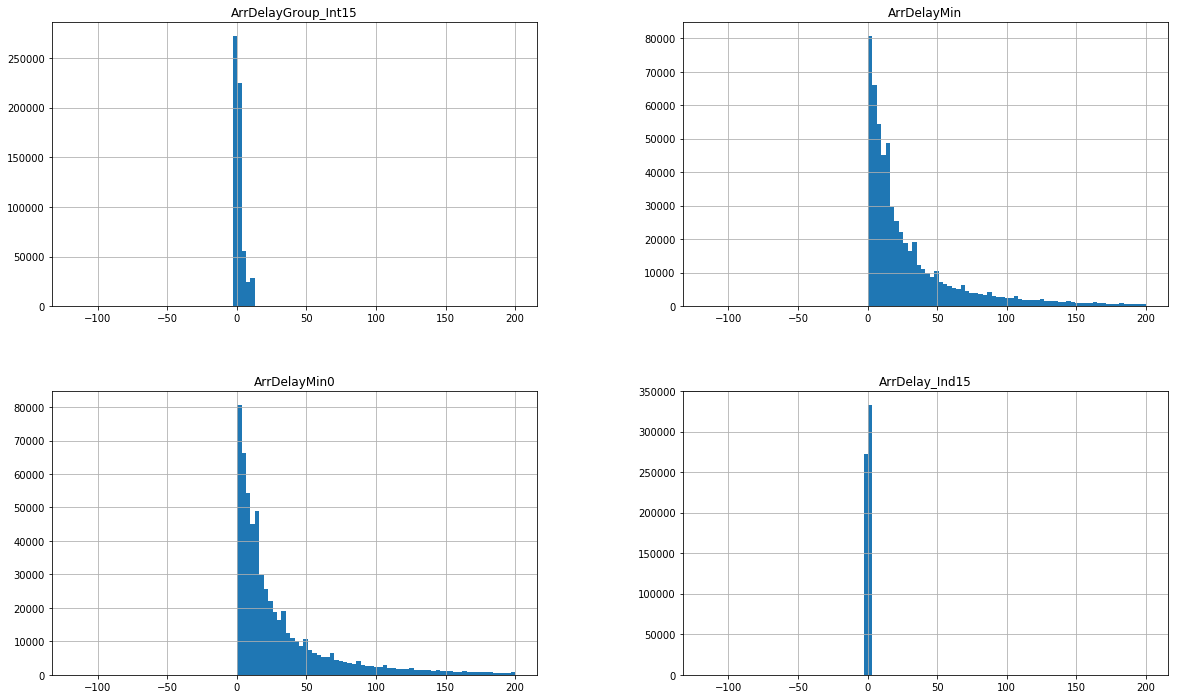

In [265]:
delay2.hist(range=[min(df['ArrDelayMin']),200], bins=100, figsize=(20,12))

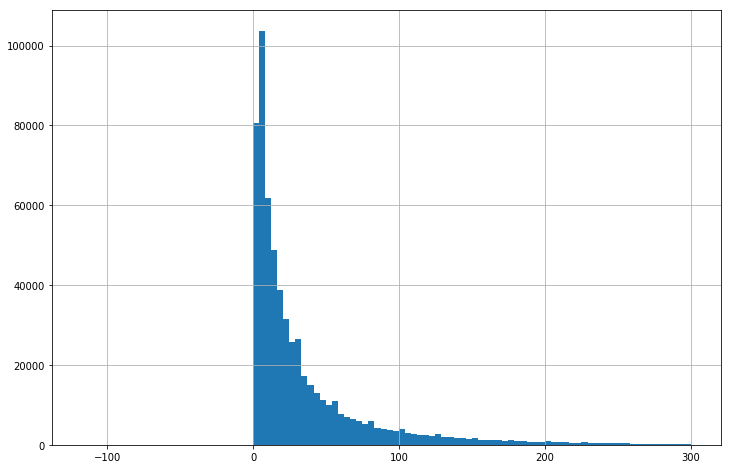

In [269]:
delay2['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8))

##### Delay Distribution Comparison: All flights vs. Delayed Flights

In [421]:
arrdelay = df['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay_delayed = delayed['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))

data3 = {'TOTAL_Flights': arrdelay, 'DELAYED_Flights': arrdelay_delayed}
description3 = pd.DataFrame(data3)
description3

,TOTAL_Flights,DELAYED_Flights
count,1668014.000000,605696.000000
mean,5.321637,39.208260
std,50.973347,72.065054
min,-117.000000,1.000000
25%,-15.000000,7.000000
50%,-6.000000,17.000000
75%,9.000000,43.000000
max,2649.000000,2649.000000


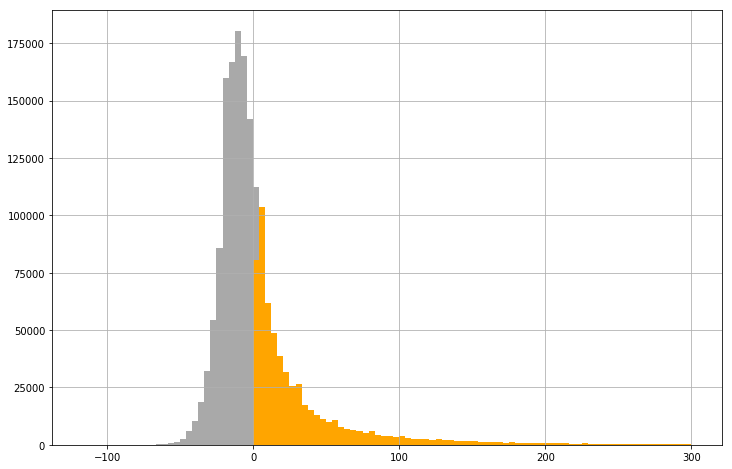

In [419]:
delay['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8), color='DarkGray')
delay2['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8), color='orange')

### Airports:

##### Top 20 airports per volume of flights

In [452]:
#Top 20 airports per volume of flights
group_by_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         OriginStateName
ATL          Atlanta, GA            Georgia            90778
ORD          Chicago, IL            Illinois           77774
DFW          Dallas/Fort Worth, TX  Texas              67089
CLT          Charlotte, NC          North Carolina     55326
DEN          Denver, CO             Colorado           54214
LAX          Los Angeles, CA        California         52634
PHX          Phoenix, AZ            Arizona            43083
IAH          Houston, TX            Texas              42845
SFO          San Francisco, CA      California         40249
LGA          New York, NY           New York           40223
LAS          Las Vegas, NV          Nevada             37896
DTW          Detroit, MI            Michigan           35720
MSP          Minneapolis, MN        Minnesota          35519
MCO          Orlando, FL            Florida            35373
DCA          Washington, DC         Virginia           33942
BOS          Boston, MA          

##### Top 20 airports per volume of flights delayed

In [458]:
df['delayed'] = df['ArrDelayMin'].apply(lambda x: x > 0)

In [455]:
delayed = df[df['delayed']==True]

In [456]:
group_by_delayed_airport = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [457]:
group_by_delayed_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         OriginStateName
ORD          Chicago, IL            Illinois           34628
ATL          Atlanta, GA            Georgia            28847
DFW          Dallas/Fort Worth, TX  Texas              27905
CLT          Charlotte, NC          North Carolina     20690
DEN          Denver, CO             Colorado           19915
LAX          Los Angeles, CA        California         17710
SFO          San Francisco, CA      California         16834
IAH          Houston, TX            Texas              15639
LGA          New York, NY           New York           15365
PHX          Phoenix, AZ            Arizona            15192
LAS          Las Vegas, NV          Nevada             13772
EWR          Newark, NJ             New Jersey         13028
MCO          Orlando, FL            Florida            12744
DCA          Washington, DC         Virginia           11682
BOS          Boston, MA             Massachusetts      11653
MSP          Minneapolis, MN     

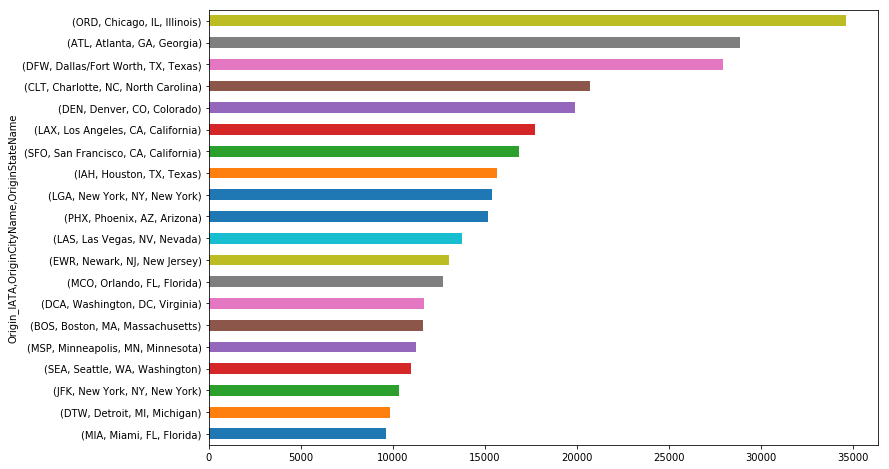

In [211]:
group_by_delayed_airport['Origin_IATA'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

 Percentage of flights delayed by airport:

In [212]:
group_by_delayed_airport2 = df.groupby(['Origin_IATA','delayed']).size().unstack()
group_by_delayed_airport2.head()

delayed,False,True
Origin_IATA,,
ABE,685,370
ABI,263,235
ABQ,3512,1713
ABR,115,65
ABY,179,63


In [213]:
group_by_delayed_airport2['total_flights'] = (group_by_delayed_airport2[True] + group_by_delayed_airport2[False])
group_by_delayed_airport2.head()

delayed,False,True,total_flights
Origin_IATA,,,
ABE,685,370,1055
ABI,263,235,498
ABQ,3512,1713,5225
ABR,115,65,180
ABY,179,63,242


In [214]:
group_by_delayed_airport2['proportion_delayed_flights'] = (group_by_delayed_airport2[True]/group_by_delayed_airport2['total_flights'])
group_by_delayed_airport2.head()

delayed,False,True,total_flights,proportion_delayed_flights
Origin_IATA,,,,
ABE,685,370,1055,0.350711
ABI,263,235,498,0.471888
ABQ,3512,1713,5225,0.327847
ABR,115,65,180,0.361111
ABY,179,63,242,0.260331


In [215]:
group_by_delayed_airport2['percentage'] = (group_by_delayed_airport2['proportion_delayed_flights'])*100
group_by_delayed_airport2.head()

delayed,False,True,total_flights,proportion_delayed_flights,percentage
Origin_IATA,,,,,
ABE,685,370,1055,0.350711,35.071090
ABI,263,235,498,0.471888,47.188755
ABQ,3512,1713,5225,0.327847,32.784689
ABR,115,65,180,0.361111,36.111111
ABY,179,63,242,0.260331,26.033058


In [274]:
group_by_delayed_airport2.sort_values(by='percentage', ascending=False).head(20)

delayed,False,True,total_flights,proportion_delayed_flights,percentage
Origin_IATA,,,,,
OGD,6,19,25,0.760000,76.000000
HGR,8,22,30,0.733333,73.333333
OWB,10,17,27,0.629630,62.962963
SCK,67,92,159,0.578616,57.861635
CYS,40,50,90,0.555556,55.555556
LCK,63,69,132,0.522727,52.272727
MEI,134,136,270,0.503704,50.370370
IAG,90,91,181,0.502762,50.276243
EGE,610,598,1208,0.495033,49.503311


##### Highest delayed Airports

ALL FLIGHTS

In [ ]:
group_by_airport = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [446]:
airports_delay = group_by_airport['ArrDelayMin'].agg(['sum', 'mean', 'count'])
airports_delay.sample(5)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
AVP,"Scranton/Wilkes-Barre, PA",Pennsylvania,743.0,1.130898,657
TLH,"Tallahassee, FL",Florida,4282.0,3.000701,1427
MFR,"Medford, OR",Oregon,23737.0,22.846006,1039
DAL,"Dallas, TX",Texas,58849.0,3.433831,17138
PVD,"Providence, RI",Rhode Island,6710.0,1.670817,4016


In [450]:
airports_delay.sort_values(by='sum', ascending=False).head(20)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
ORD,"Chicago, IL",Illinois,1058274.0,14.429697,73340
DFW,"Dallas/Fort Worth, TX",Texas,521468.0,7.954300,65558
SFO,"San Francisco, CA",California,473527.0,12.219106,38753
EWR,"Newark, NJ",New Jersey,298695.0,9.632215,31010
LGA,"New York, NY",New York,287944.0,7.397595,38924
IAH,"Houston, TX",Texas,261284.0,6.184237,42250
DEN,"Denver, CO",Colorado,256521.0,4.799181,53451
BOS,"Boston, MA",Massachusetts,224607.0,6.918009,32467
MCO,"Orlando, FL",Florida,222493.0,6.380276,34872


In [451]:
airports_delay2.sort_values(by='mean', ascending=False).head(20)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
JMS,"Jamestown, ND",North Dakota,14847.0,170.655172,87
DVL,"Devils Lake, ND",North Dakota,6543.0,145.400000,45
IMT,"Iron Mountain/Kingsfd, MI",Michigan,6111.0,142.116279,43
PLN,"Pellston, MI",Michigan,8725.0,134.230769,65
APN,"Alpena, MI",Michigan,6057.0,128.872340,47
ITH,"Ithaca/Cortland, NY",New York,7550.0,127.966102,59
OTH,"North Bend/Coos Bay, OR",Oregon,3803.0,115.242424,33
BJI,"Bemidji, MN",Minnesota,5258.0,114.304348,46
LWB,"Lewisburg, WV",West Virginia,6282.0,114.218182,55


ONLY DELAYED FLIGHTS

In [223]:
group_by_airport2 = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [447]:
airports_delay2 = group_by_airport2['ArrDelayMin'].agg(['sum', 'mean', 'count'])
airports_delay2.sample(5)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
LAX,"Los Angeles, CA",California,644033.0,36.365500,17710
OME,"Nome, AK",Alaska,742.0,23.935484,31
CLE,"Cleveland, OH",Ohio,162716.0,44.024892,3696
SGU,"St. George, UT",Utah,9883.0,30.981191,319
SRQ,"Sarasota/Bradenton, FL",Florida,30608.0,43.231638,708


In [448]:
airports_delay2.sort_values(by='sum', ascending=False).head(20)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
ORD,"Chicago, IL",Illinois,1550559.0,44.777608,34628
DFW,"Dallas/Fort Worth, TX",Texas,922413.0,33.055474,27905
ATL,"Atlanta, GA",Georgia,908308.0,31.487087,28847
SFO,"San Francisco, CA",California,774131.0,45.986159,16834
LGA,"New York, NY",New York,712941.0,46.400325,15365
DEN,"Denver, CO",Colorado,704566.0,35.378659,19915
LAX,"Los Angeles, CA",California,644033.0,36.365500,17710
CLT,"Charlotte, NC",North Carolina,587106.0,28.376317,20690
BOS,"Boston, MA",Massachusetts,586228.0,50.307045,11653


In [449]:
airports_delay2.sort_values(by='mean', ascending=False).head(20)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
JMS,"Jamestown, ND",North Dakota,14847.0,170.655172,87
DVL,"Devils Lake, ND",North Dakota,6543.0,145.400000,45
IMT,"Iron Mountain/Kingsfd, MI",Michigan,6111.0,142.116279,43
PLN,"Pellston, MI",Michigan,8725.0,134.230769,65
APN,"Alpena, MI",Michigan,6057.0,128.872340,47
ITH,"Ithaca/Cortland, NY",New York,7550.0,127.966102,59
OTH,"North Bend/Coos Bay, OR",Oregon,3803.0,115.242424,33
BJI,"Bemidji, MN",Minnesota,5258.0,114.304348,46
LWB,"Lewisburg, WV",West Virginia,6282.0,114.218182,55


##### Delays of the Top 20 airports per volume of flights

In [21]:
top_20_airports = df['Origin_IATA'].value_counts().head(20)

In [26]:
top_20_airports_names = top_20_airports.index.tolist()
top_20_airports_names

['ATL',
 'ORD',
 'DFW',
 'CLT',
 'DEN',
 'LAX',
 'PHX',
 'IAH',
 'SFO',
 'LGA',
 'LAS',
 'DTW',
 'MSP',
 'MCO',
 'DCA',
 'BOS',
 'EWR',
 'JFK',
 'SEA',
 'PHL']

In [27]:
top_volume_airports =  df[df['Origin_IATA'].isin(top_20_airports_names)]
top_volume_airports.sample(5)

,Unnamed: 0,Year,Quarter,Month,DayOfMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,RegistrationNum,...,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil,DepTime2,ArrTime2,DepDateTime,ArrDateTime
113813,113813,2018,4,12,14,5,2018-12-14,OH,OH,N576NN,...,106.0,109.0,82.0,1.0,460.0,2,13:05,13:54,2018-12-14 13:05:00,2018-12-14 13:54:00
455914,455914,2018,4,12,11,2,2018-12-11,UA,UA,N14230,...,293.0,293.0,266.0,1.0,1874.0,8,09:32,12:25,2018-12-11 09:32:00,2018-12-11 12:25:00
1608189,1608189,2019,1,2,4,1,2019-02-04,DL,DL,N350DN,...,157.0,153.0,128.0,1.0,946.0,4,15:28,18:01,2019-02-04 15:28:00,2019-02-04 18:01:00
1360652,1360652,2019,1,2,1,5,2019-02-01,NK,NK,N634NK,...,276.0,284.0,246.0,1.0,2052.0,9,23:15,06:59,2019-02-01 23:15:00,2019-02-01 06:59:00
1591110,1591110,2019,1,2,24,7,2019-02-24,YX,YX,N631RW,...,184.0,247.0,168.0,1.0,1034.0,5,10:07,14:14,2019-02-24 10:07:00,2019-02-24 14:14:00


In [28]:
top_volume_airports.shape

(896395, 49)

In [33]:
top_volume_airports_pivots = top_volume_airports.pivot_table(index='FlightDate', columns='Origin_IATA', values='ArrDelayMin')
top_volume_airports_pivots.describe()

Origin_IATA,ATL,BOS,CLT,DCA,DEN,DFW,DTW,EWR,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHL,PHX,SEA,SFO
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.940241,8.839150,4.132944,6.285190,4.761622,7.949313,-0.489122,9.602827,6.000648,2.322570,4.775862,2.234895,5.749291,6.228466,2.890732,17.095579,0.887714,2.566109,5.088192,12.724018
std,10.491067,30.670567,8.484677,19.911498,11.752303,11.907225,20.064009,18.287228,12.371428,17.432338,11.816642,8.695192,23.454044,10.294778,27.361238,25.798087,11.438782,7.528043,21.711671,18.943867
min,-11.416999,-18.852564,-6.148410,-13.512262,-10.979764,-7.402157,-19.908072,-17.003145,-10.279720,-20.954930,-12.375000,-12.811828,-25.750000,-6.287599,-21.564987,-9.269514,-15.144695,-9.207627,-10.801858,-9.983871
25%,-3.836811,-7.685063,-0.891908,-3.636073,-2.610490,1.157403,-12.990347,-1.953601,-0.605354,-9.339589,-1.581423,-3.426834,-8.697322,0.085929,-12.044612,0.873559,-7.799183,-2.453491,-4.357276,-0.605650
50%,-1.303904,-0.544404,2.446334,1.048973,2.110046,5.288360,-6.843081,7.239415,2.725380,-1.560269,2.274021,1.175278,-2.087036,3.279786,-4.404190,8.211696,-1.151800,1.764777,-0.504142,5.806888
75%,5.157846,11.528253,6.494936,10.547609,9.205518,9.581063,5.849943,16.321054,9.674803,7.964403,9.148208,7.300049,10.557813,9.963080,9.860020,24.033598,5.697590,5.465870,5.771913,19.966469
max,60.176695,163.163636,52.125201,138.687500,61.296928,69.779528,103.277946,82.271565,76.308176,66.481183,72.587189,30.357877,85.560538,64.442029,155.720670,129.455399,39.977186,32.433538,123.269481,81.927577


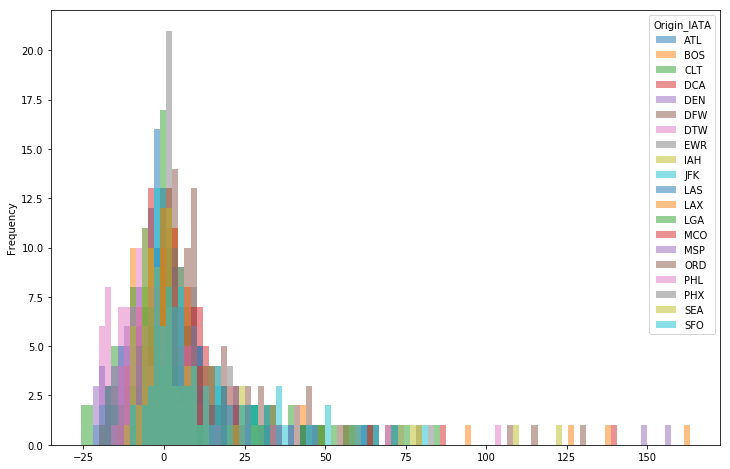

In [444]:
top_volume_airports_pivots.plot(kind='hist', bins=100, figsize=(12,8), alpha=0.5)

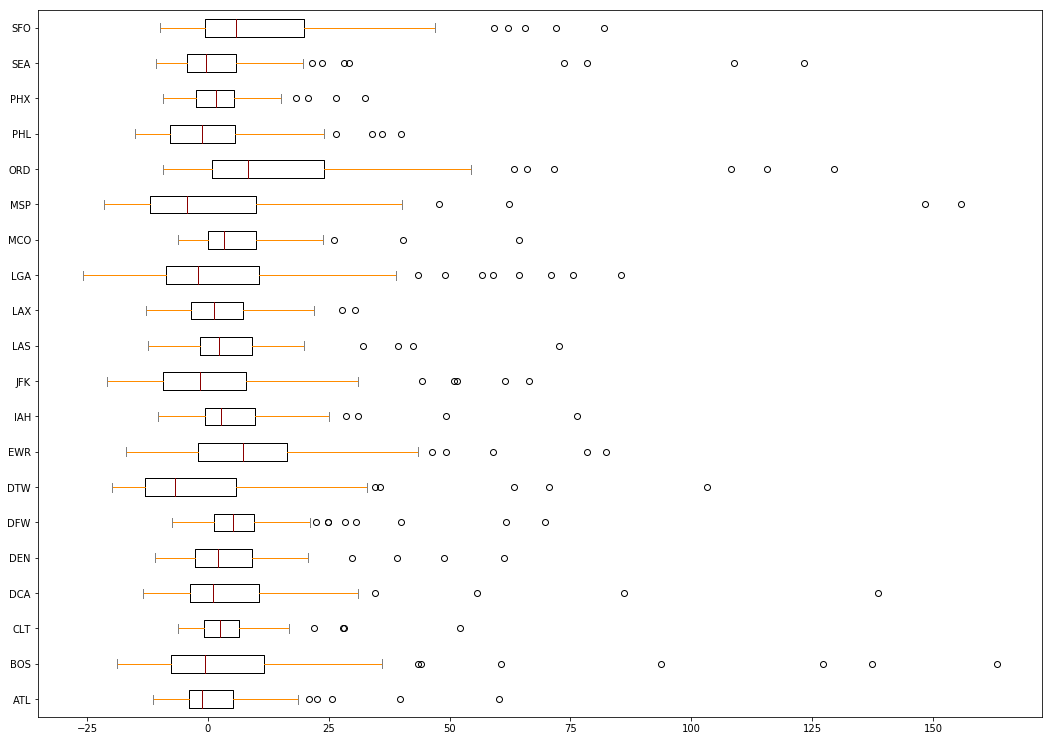

In [438]:
color = dict(boxes='Black', whiskers='DarkOrange', medians='DarkRed', caps='Gray')
top_volume_airports_pivots.plot(kind='box', vert=False, color=color, figsize=(18,13))

### Routes:

##### Most flown Routes

In [480]:
group_by_route = df.groupby(['Origin_IATA','Dest_IATA','FlightNum'])

In [484]:
most_flown = group_by_route['FlightNum'].count().sort_values(ascending=False)
most_flown.head(20)

Origin_IATA  Dest_IATA  FlightNum
SFO          JFK        16           179
EWR          MCO        1527         165
BOS          BWI        1027         164
ATL          MCO        1153         139
LAX          JFK        24           136
PHL          BOS        1776         134
CMH          ORD        3476         131
LAX          OAK        949          128
EWR          PHX        230          111
JFK          SFO        15           104
AUS          FLL        512          104
PHL          BOS        2660          99
LAS          DEN        764           95
IAH          MIA        1614          93
ATL          ORD        762           92
JFK          SJU        2571          90
CLT          GRR        5185          90
JFK          SYR        116           90
             SRQ        163           90
             MCO        1183          90
Name: FlightNum, dtype: int64

##### Most flown Routes, by top volume of flights airports

In [486]:
top_20_airports = df['Origin_IATA'].value_counts().head(20)
top_20_airports_names = top_20_airports.index.tolist()

In [506]:
top_volume_airports =  df[df['Origin_IATA'].isin(top_20_airports_names)]

In [509]:
group_by_route2 = top_volume_airports.groupby(['Origin_IATA','Dest_IATA','FlightNum'])   

In [524]:
most_flown2 = group_by_route2['FlightNum'].count().sort_values(ascending=False)
most_flown2.head(20)

Origin_IATA  Dest_IATA  FlightNum
SFO          JFK        16           179
EWR          MCO        1527         165
BOS          BWI        1027         164
ATL          MCO        1153         139
LAX          JFK        24           136
PHL          BOS        1776         134
LAX          OAK        949          128
EWR          PHX        230          111
JFK          SFO        15           104
PHL          BOS        2660          99
LAS          DEN        764           95
IAH          MIA        1614          93
ATL          ORD        762           92
DFW          RDU        2745          90
             SFO        2248          90
                        5483          90
             SGF        3767          90
             RDU        1155          90
             SGF        3793          90
                        3795          90
Name: FlightNum, dtype: int64

##### Most delayed Routes, average delay

In [539]:
delayed_routes = group_by_route['ArrDelayMin'].mean()\
    .sort_values(ascending=False)
delayed_routes.head(30)

Origin_IATA  Dest_IATA  FlightNum
ATL          IAH        6237         1444.000000
CLT          MKE        3033         1431.000000
SEA          SFO        986           931.000000
ELP          DEN        5796          904.000000
SFO          SEA        986           902.000000
EWR          DAY        3969          889.000000
SFO          DEN        1604          877.000000
IAH          LIT        5210          828.000000
JAX          ORD        3074          705.500000
TVC          DTW        3427          605.000000
MSP          ORD        3696          567.500000
LFT          ATL        4934          507.000000
DCA          JFK        3499          494.000000
SLC          SFO        1212          492.000000
MSP          RAP        3288          454.500000
BWI          JFK        5270          445.000000
FSD          ORD        1142          445.000000
FAR          ORD        3974          416.000000
FSD          DEN        3729          404.000000
BRO          ORD        5588       

##### Most delayed Routes, by top volume of flights airports

In [540]:
delayed_routes2 = group_by_route2['ArrDelayMin'].mean()\
    .sort_values(ascending=False)
delayed_routes2.head(30)

Origin_IATA  Dest_IATA  FlightNum
ATL          IAH        6237         1444.000000
CLT          MKE        3033         1431.000000
SEA          SFO        986           931.000000
SFO          SEA        986           902.000000
EWR          DAY        3969          889.000000
SFO          DEN        1604          877.000000
IAH          LIT        5210          828.000000
MSP          ORD        3696          567.500000
DCA          JFK        3499          494.000000
MSP          RAP        3288          454.500000
ATL          BQK        3934          385.500000
IAH          SHV        6136          381.500000
ORD          SYR        4360          379.000000
CLT          DTW        5224          377.000000
EWR          ORD        438           374.000000
MSP          DFW        1697          359.000000
             FAR        3644          348.500000
LAS          SFO        1728          329.000000
JFK          PWM        5435          327.000000
ORD          FSD        4117       

### Carrier: